In [340]:
!pip install pandas
import pandas as pd

data = pd.read_csv('./StudentPerformanceFactors.csv')

In [341]:
print(data.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


Έχουμε 19 χαρακτηριστικά και προσπαθούμε να προβλέψουμε την τιμή του Exam_Score.

In [342]:
num_rows = data.shape[0]
num_char = data.shape[1]
print(num_rows)
print(num_char)

6607
20


In [343]:
print(data.isna().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


Παρατηρούμε πως τα attributes Teacher_quality, Parental_Education_Level και Distance_from_Home έχουν missing values. Τα μοντέλα μηχανικής μάθησης δεν μπορούν να διαχειριστούν δεδομένα με ελλιπείς τιμές. Για να αντιμετωπίσουμε το συγκεκριμένο πρόβλημα μπορούμε να αφαιρέσουμε τις συγκεκριμένες παρατηρήσεις αφού όπως μπορούμε να δούμε είναι πολύ λίγες και οι παρατηρήσεις μας πολλές. Το πλήθος των γραμμών στις οποίες υπάρχουν ελλειπέις τιμες είναι μικρότερο απο το 10% των συνολικών γραμμών.

In [344]:
data.dropna(inplace=True)

In [345]:
print(data.isna().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


Πλέων δεν υπάρχουν ελλειπείς τιμές στις παρατηρήσεις μας. Παρακάτω υπολογιζουμε το νέο μέγεθος του dataframe μετά την διαγραφή των γραμμών που περιείχαν ελλειπείς τιμές.

In [346]:
num_rows = data.shape[0]
num_columns = data.shape[1]

print("Number of Rows: ", num_rows)
print()
print("Number of columns: ", num_columns)

Number of Rows:  6378

Number of columns:  20


In [347]:
print(data.tail())

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
6602           Medium             Yes                  1          High   
6603

In [348]:
data.reset_index(drop=True, inplace=True)

Το παραπάνω το κάναμε έτσι ώστε να γίνουν reset τα indexes στο data και να εμφανίζεται σωστά ο αριθμός της κάθε γραμμής.

In [349]:
print(data.tail())

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6373             25          69                 High              Medium   
6374             23          76                 High              Medium   
6375             20          90               Medium                 Low   
6376             10          86                 High                High   
6377             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
6373                         No            7               76   
6374                         No            8               81   
6375                        Yes            6               65   
6376                        Yes            6               91   
6377                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
6373           Medium             Yes                  1          High   
6374

In [350]:
print(data.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


Παρατηρούμε πως κάποια απο τα χαρακτηριστικά είναι κατηγορικά και κάποια άλλα αριθμητικά. Το Physical_Activity παρόλο που αποτελεί αριθμητική μεταβλητή αποτελεί κωδικοποιημένη κατηγορική μεταβλητή, η οποία παίρνει ακαίρεες τιμές απο το 0 μέχρι και το 6. Το 0 συμβοίζει την ελάχιστη φυσική δραστηριότητα και το 6 την μέγιστη. Η μεταβλητή η οποία προσπαθούμε να προβλέψουμε είναι αριθμητική επομένως έχουμε πρόβλημα παλινδρόμισης.

Παρακάτω θα παρουσιάσουμε συγκεκριμένα χαρακτηριστικά των δεδομένων έτσι ώστε να πάρουμε μια καλύτερη εικόνα για αυτά.

In [351]:
data["Physical_Activity"] = data["Physical_Activity"].astype("object") # Αρχικά κάνουμε το Physical_Activity object αφού αποτελεί κατηγορική μεταβλητή.

summary = data.describe()
summary_object = data.describe(include='object')

print("Summary of all numerical attributes: ")
print()
print(summary)
print()
print("Summary of all categorical attributes: ")
print()
print(summary_object)
print(data["Physical_Activity"].tail())

Summary of all numerical attributes: 

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6378.000000  6378.000000  6378.000000      6378.000000   
mean       19.977109    80.020853     7.034964        75.066165   
std         5.985460    11.550723     1.468033        14.400389   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        88.000000   
max        44.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions   Exam_Score  
count        6378.000000  6378.000000  
mean            1.495296    67.252117  
std             1.233984     3.914217  
min             0.000000    55.000000  
25%             1.000000    65.000000  
50%             1.000000    67.000000  
75%             2.000000    69.000000  
max             8.000000   101.000000

In [352]:
numeric_data = data.select_dtypes(include=['number'])
categorical_data = data.select_dtypes(include=['object'])

In [353]:
IQR = summary.loc['75%'] - summary.loc['25%']
evros = summary.loc['max'] - summary.loc['min']
median = numeric_data.median()

print("Range: ")
print()
print(evros)
print()
print("IQR: ")
print()
print(IQR)
print()
print("Median: ")
print()
print(median)

Range: 

Hours_Studied        43.0
Attendance           40.0
Sleep_Hours           6.0
Previous_Scores      50.0
Tutoring_Sessions     8.0
Exam_Score           46.0
dtype: float64

IQR: 

Hours_Studied         8.0
Attendance           20.0
Sleep_Hours           2.0
Previous_Scores      25.0
Tutoring_Sessions     1.0
Exam_Score            4.0
dtype: float64

Median: 

Hours_Studied        20.0
Attendance           80.0
Sleep_Hours           7.0
Previous_Scores      75.0
Tutoring_Sessions     1.0
Exam_Score           67.0
dtype: float64


Παρακάτω παρουσιάζονται οι συσχετίσεις μεταξύ των αριθμητικών μεταβλητών(Pearson table), μεταξύ των κατηγορικών μεταβλητών(Cramer's V) και μεταξύ των αριθμητικών και κατηγορικών(ANOVA).   

<Axes: >

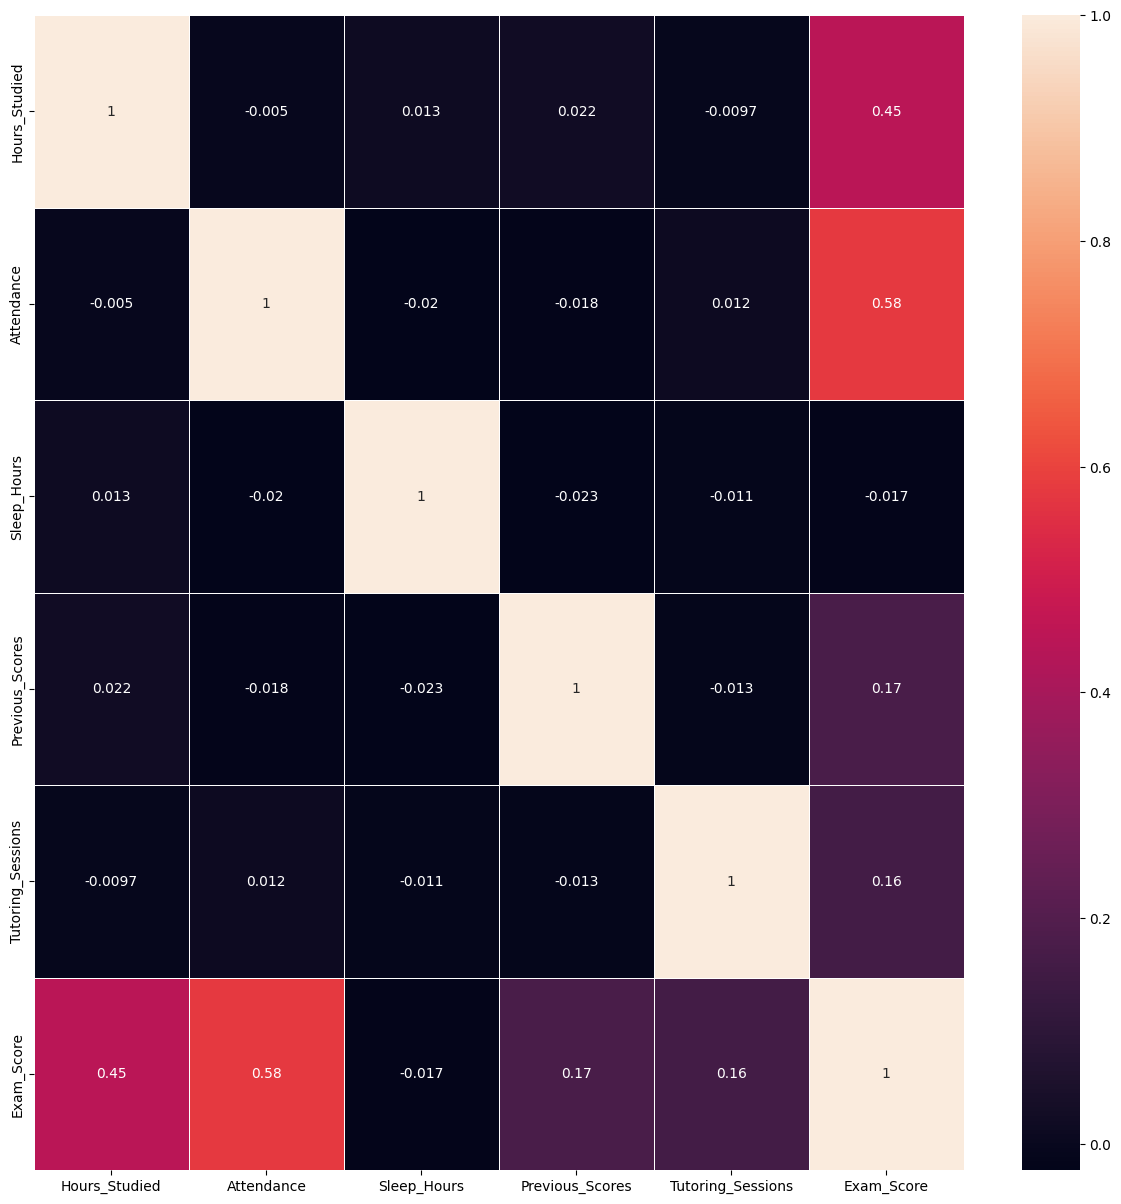

In [354]:
!pip install seaborn
!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sn

corr_matrix = numeric_data.corr()

fig, ax = plt.subplots(figsize=(15,15))       
sn.heatmap(corr_matrix, annot=True,linewidths=.5, ax=ax)

<Axes: >

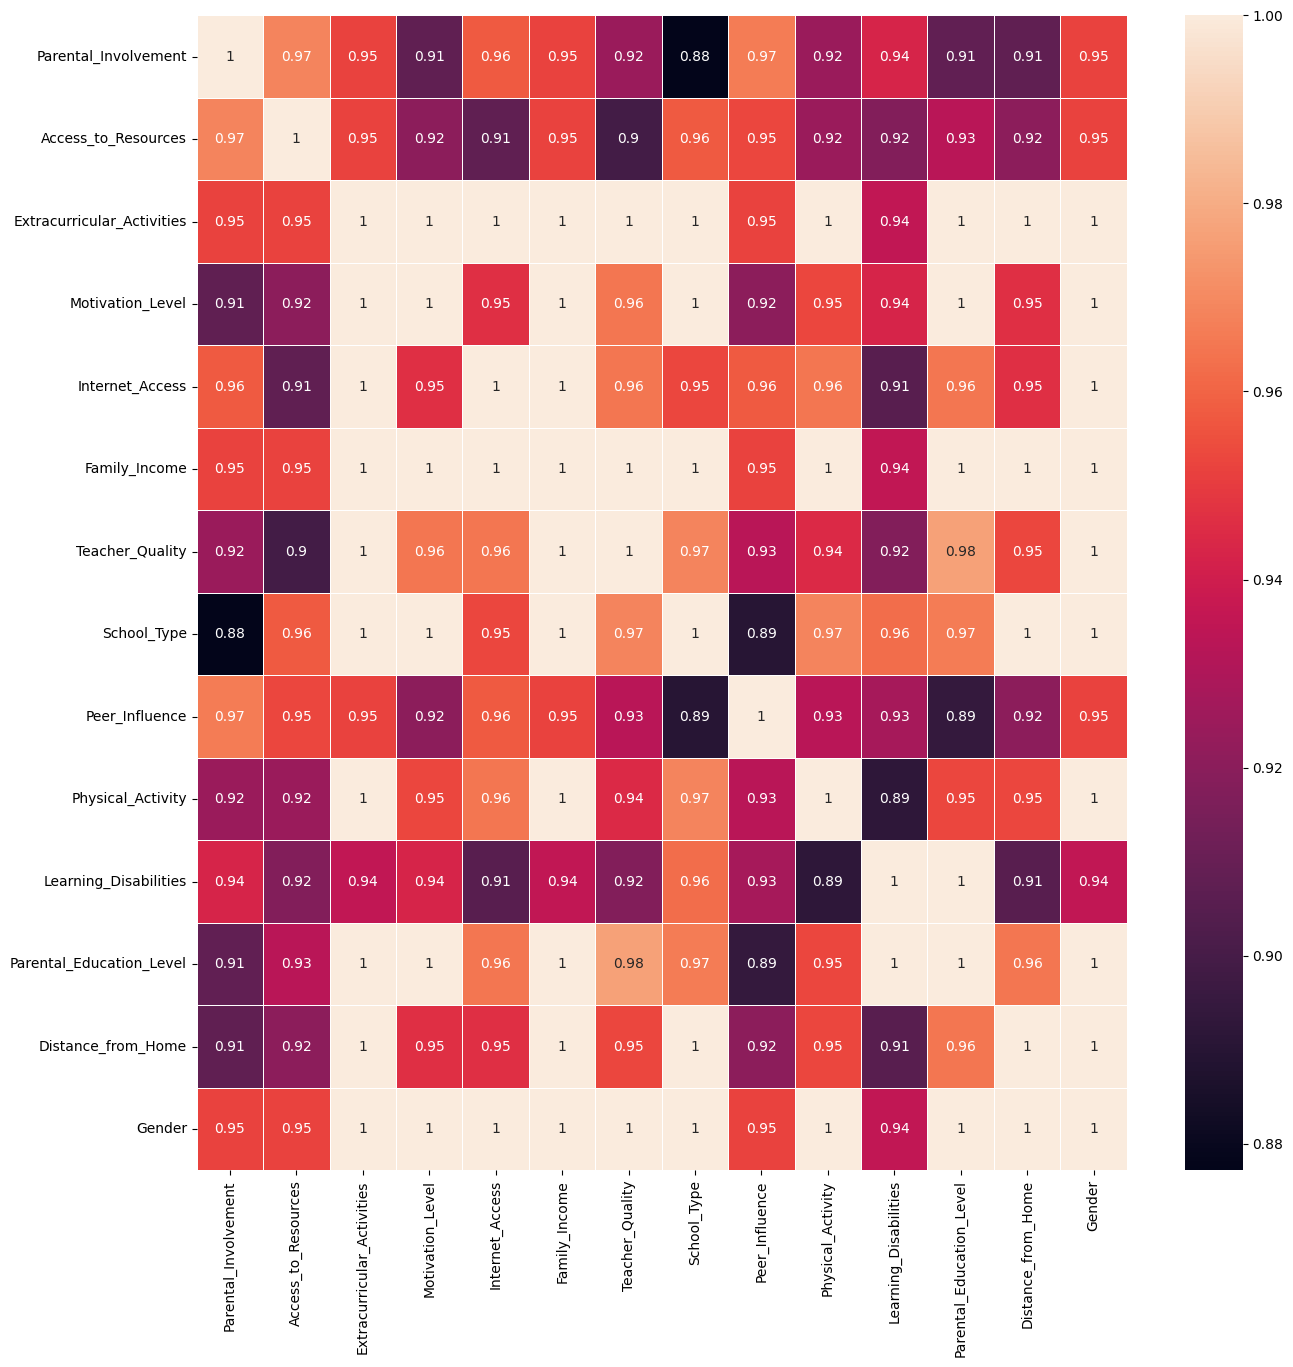

In [355]:
!pip install scipy
!pip install numpy

from scipy.stats import chi2_contingency
import numpy as np
categorical_attributes = categorical_data.columns

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V
    n = contingency_table.sum().sum()  
    r, k = contingency_table.shape     
    cramers_v_value = np.sqrt(chi2 / (n * (min(r, k) - 1)))
    
    return cramers_v_value



fig, ax = plt.subplots(figsize=(15,15))       

df = pd.DataFrame(index=categorical_attributes, columns=categorical_attributes)

for i in range(categorical_data.shape[1]):
    for j in range(categorical_data.shape[1]):
        df.iloc[i,j] = cramers_v(categorical_data.iloc[i], categorical_data.iloc[j])
        
df = df.astype(float)
sn.heatmap(df, annot=True,linewidths=.5, ax=ax)

<Axes: >

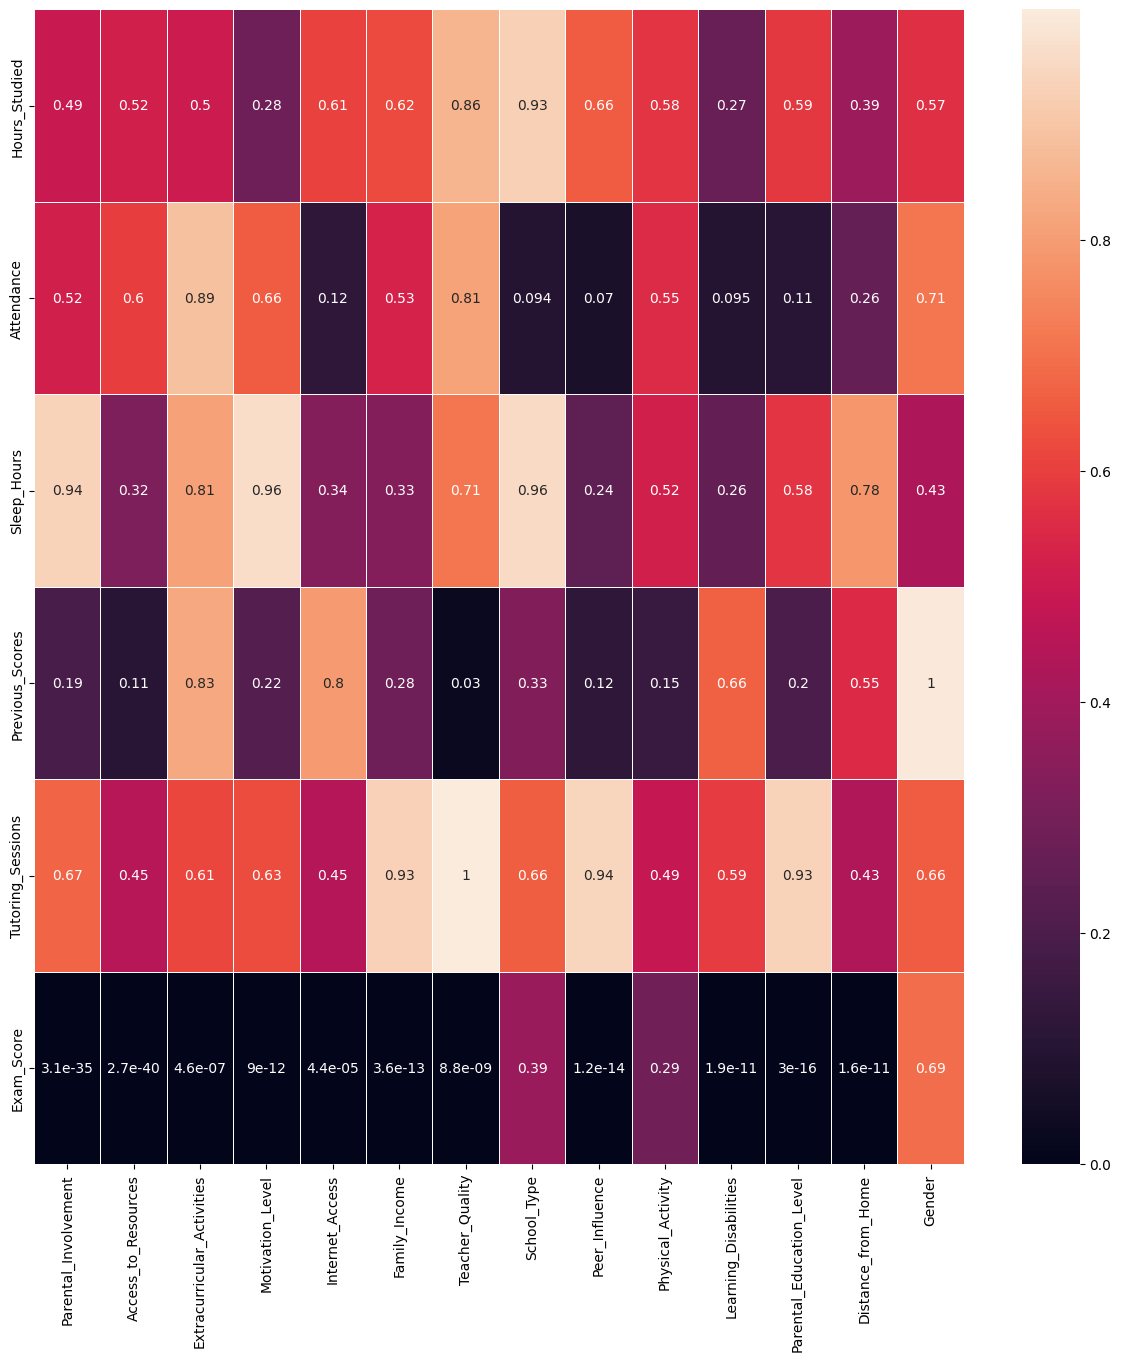

In [356]:
from scipy.stats import f_oneway

numeric_attributes = numeric_data.columns
df = pd.DataFrame(index=numeric_attributes, columns=categorical_attributes)

def anova_test(x, y):
    categories = y.unique()
    grouped_data = [x[y==cat] for cat in categories]
    f_stat, p_value = f_oneway(*grouped_data)
    return p_value

fig, ax = plt.subplots(figsize=(15,15))

for i in range(len(numeric_attributes)):
    for j in range(categorical_data.shape[1]):
        df.iloc[i,j] = anova_test(numeric_data.iloc[:,i],categorical_data.iloc[:,j])

df = df.astype(float)
sn.heatmap(df, annot=True,linewidths=.5, ax=ax)

Παρακάτω δίνονται τα ιστογράμματα και τα boxplots όλων των αριθμητικών χαρακτηριστικών.

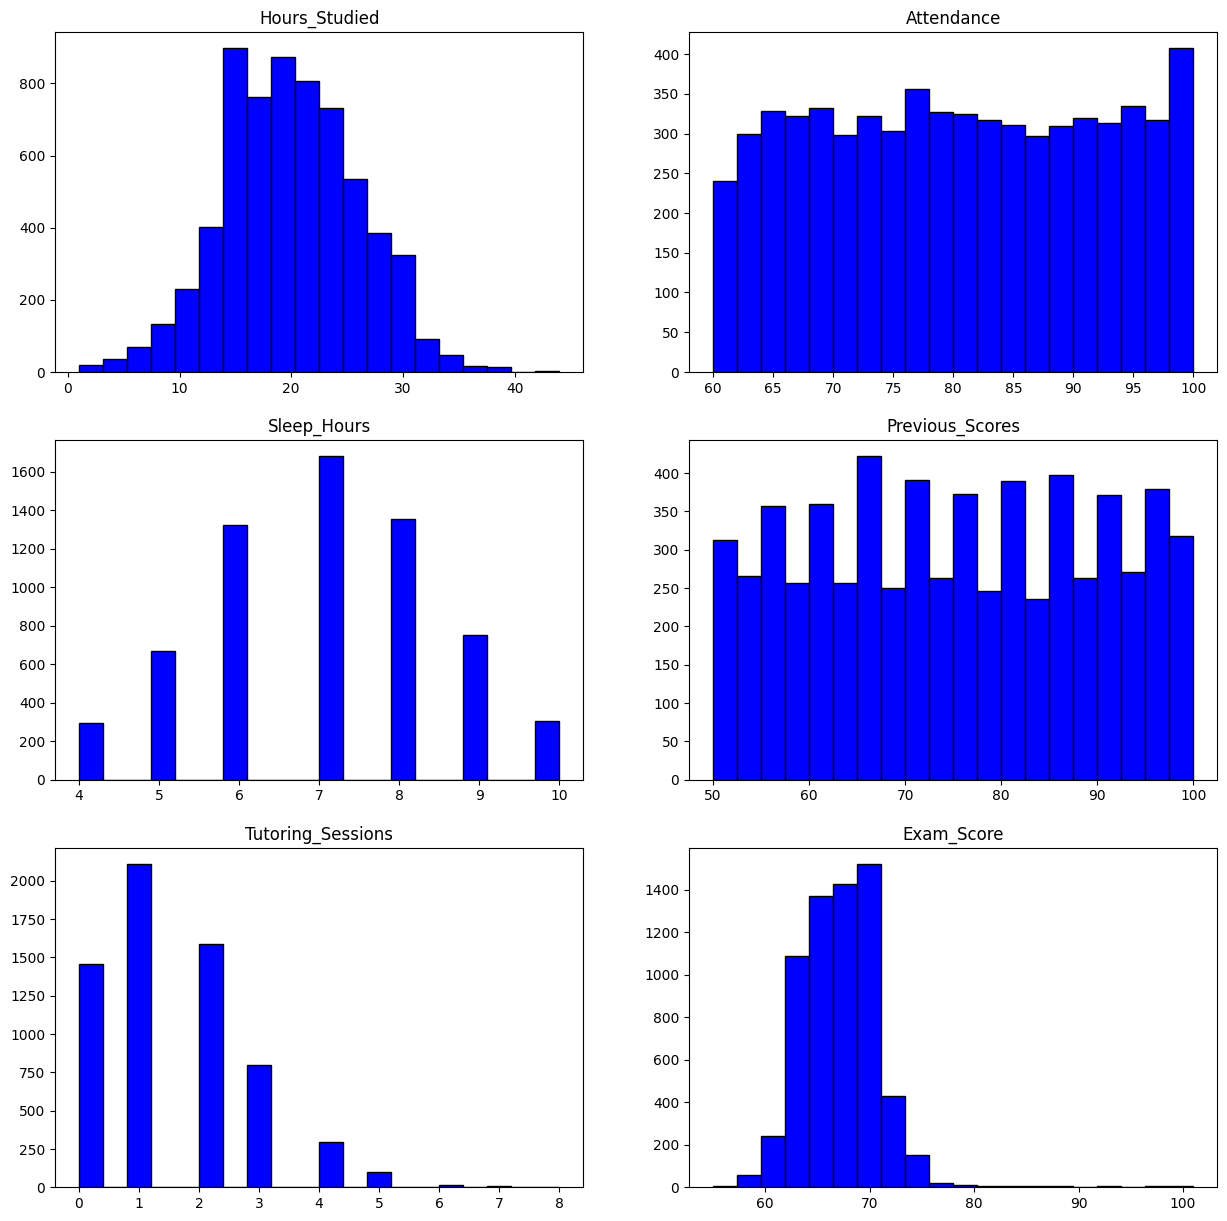

In [357]:
fig ,ax = plt.subplots(figsize=(15,15), nrows=3, ncols=2)

for i in range(len(numeric_attributes)):
    ax[i//2,i%2].hist(numeric_data.iloc[:,i], bins=20, color='blue', edgecolor='black')
    ax[i//2,i%2].set_title(numeric_attributes[i])

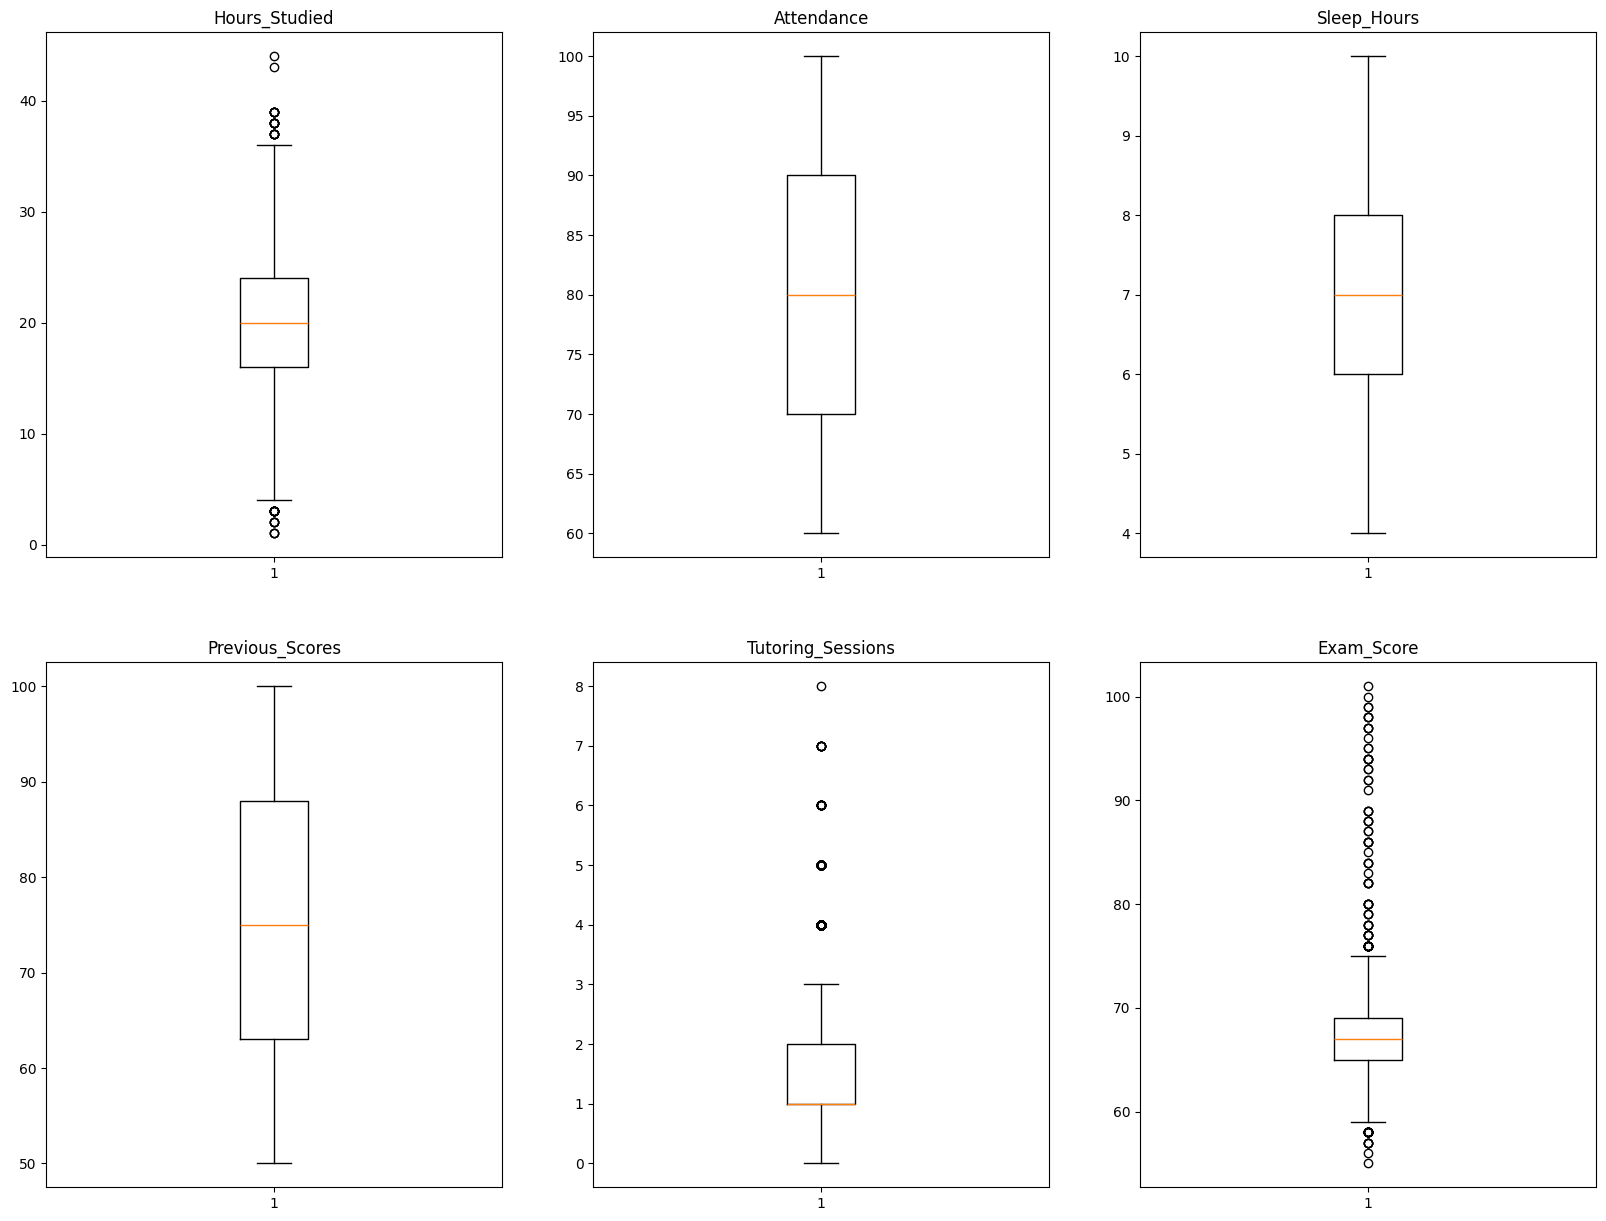

In [358]:
fig ,ax = plt.subplots(figsize=(20,15), nrows=2, ncols=3)

for i in range(len(numeric_attributes)):
    ax[i//3,i%3].boxplot(numeric_data.iloc[:,i])
    ax[i//3,i%3].set_title(numeric_attributes[i])

Στη συνέχεια για κάθε κατηγορική μεταβλητή δημιουργούμε ένα barplot για να δούμε το πλήθος κάθε κατηγορίας σε κάθε χαρακτηριστικό.

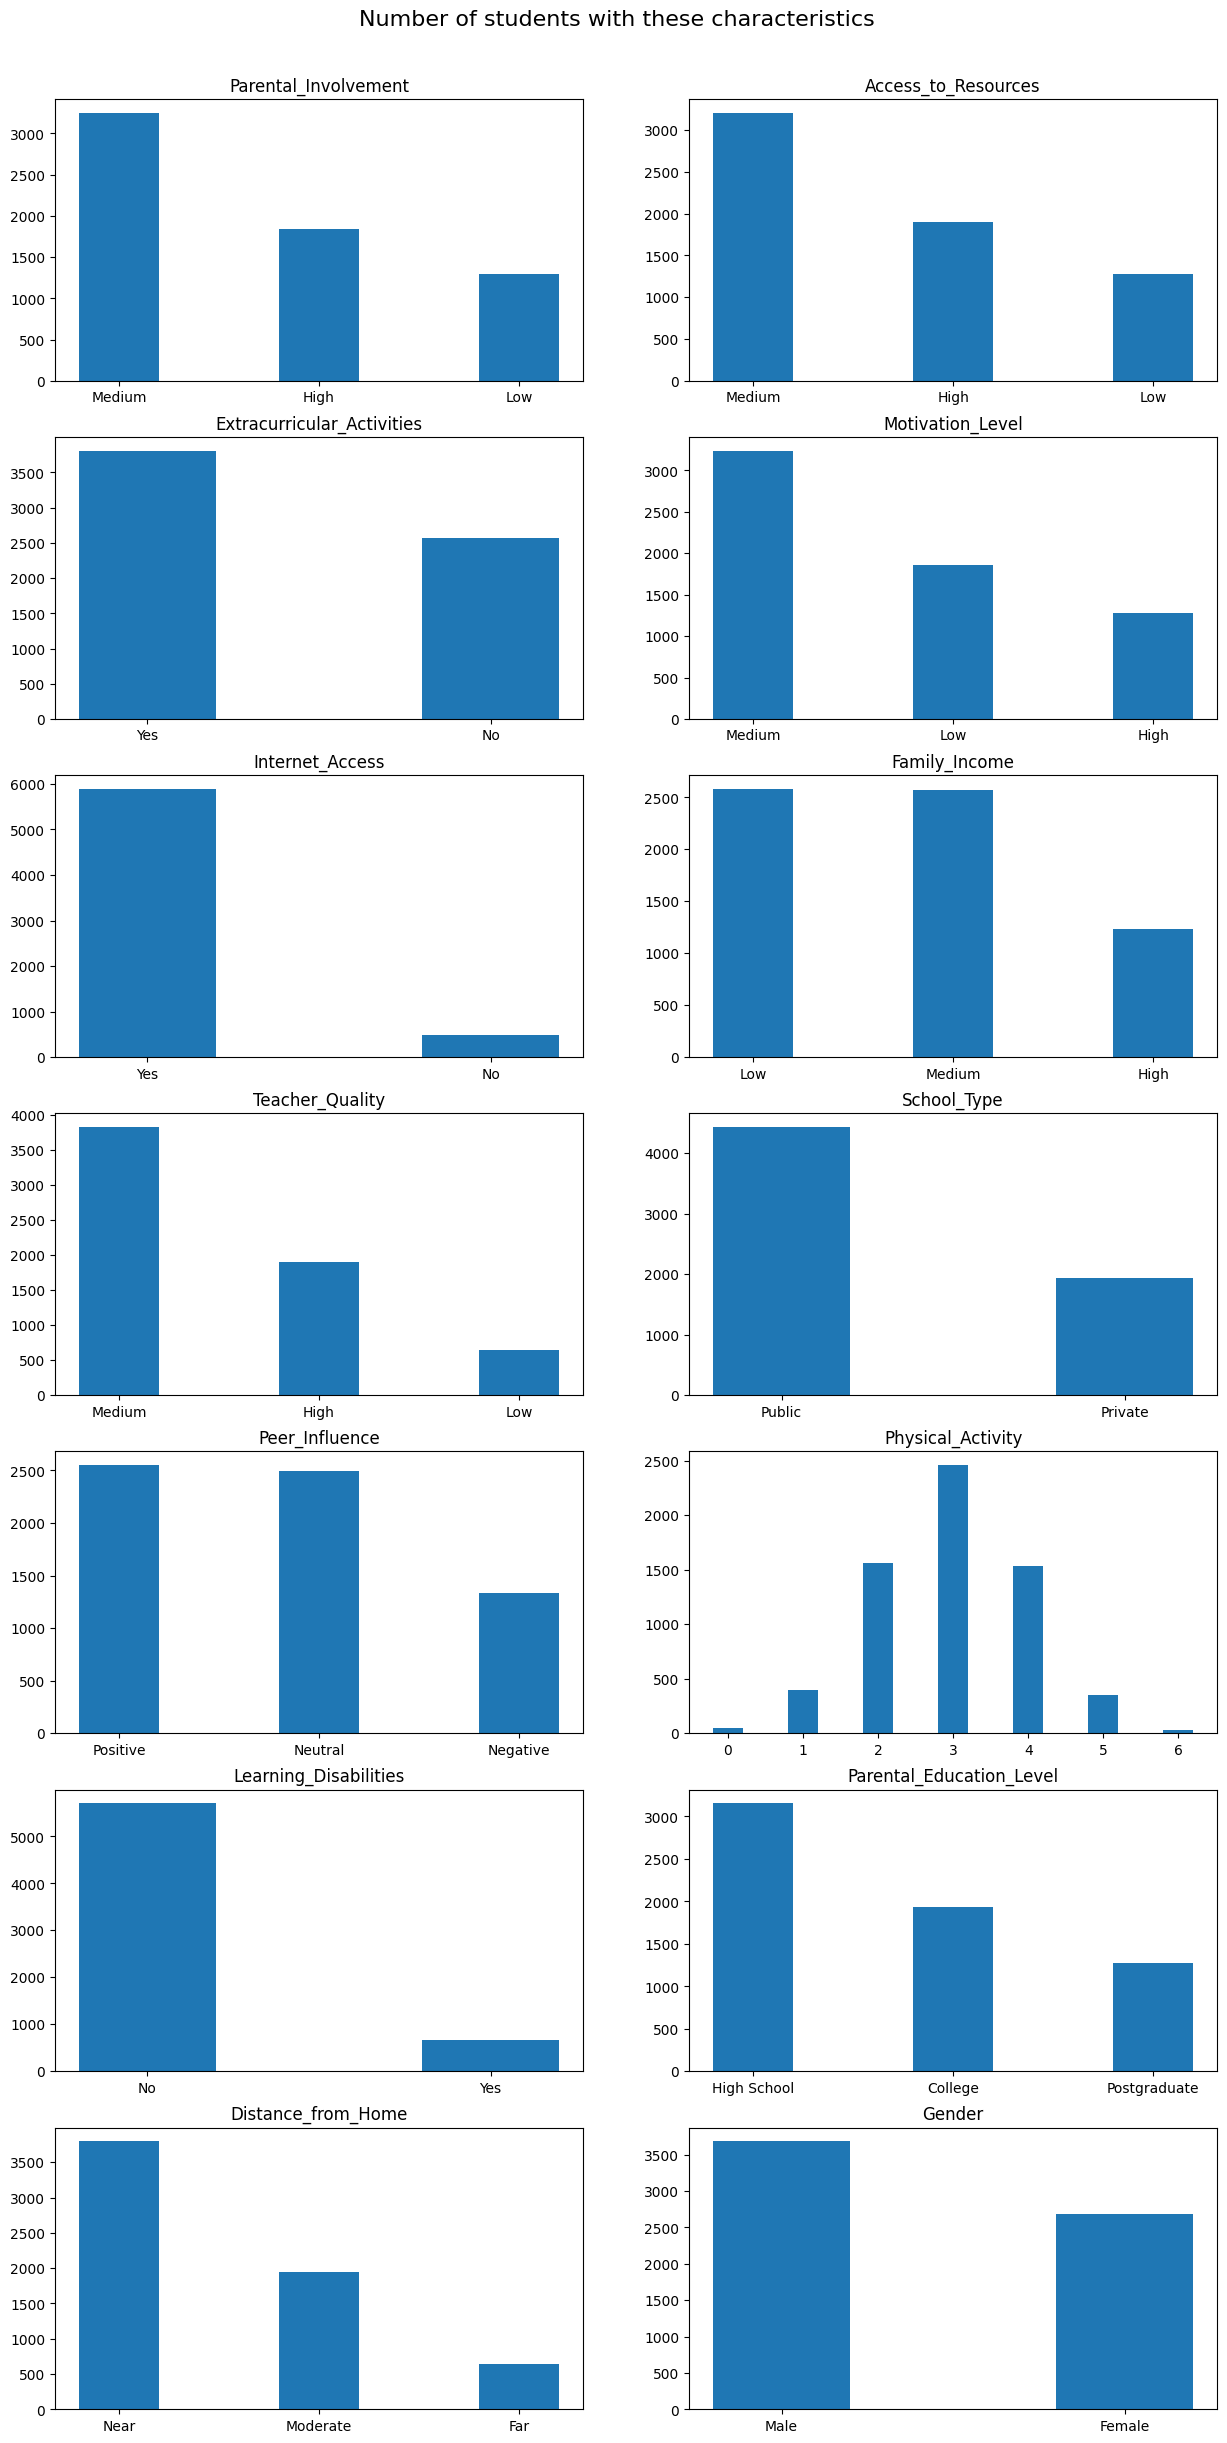

In [359]:
fig ,ax = plt.subplots(figsize=(15,30), nrows=7, ncols=2)

fig.suptitle("Number of students with these characteristics", fontsize=16, y=0.91)

for i in range(len(categorical_attributes)):
    ax[i//2,i%2].bar(categorical_data[categorical_attributes[i]].value_counts().index, categorical_data[categorical_attributes[i]].value_counts(),width=0.4)
    ax[i//2,i%2].set_title(categorical_attributes[i])

Γνωρίζουμε πως τα μοντέλα μηχανικής μάθησης δεν μπορούν να διαχειριστούν μη-αριθμητικά δεδομένα. Επομένως, μέσω των encoders θα τα μετατρέψουμε με κατάλληλο τρόπο σε αριθμητικά χωρίς όμως να αλλάζουμε την ιδιότητα τους πως αποτελούν κατηγορίες. Θα χρησιμοποιήσουμε Ordinal encoder για τα χαρακτηριστικά τα οποία περιέχουν κατηγορίες, οι οποίες έχουν κάποια φυσική σειρά(π.χ. "Low","Medium","High") και OneHot encoder για τα χαρακτηριστικά τα οποία περιέχουν κατηγορίες, οι οποίες δεν έχουν κάποια φυσική σειρά(π.χ. "Yes","No").

Όταν χρησιμοποιούμε αλγόριθμους μηχανικής μάθησης οι οποίοι περιέχουν αποστάσεις(π.χ. K-Neighbors Classifier, K-means, linear regression, polynomial regression etc.) πρέπει να κάνουμε κάποια κλιμάκωση στα δεδομένα μας. Αυτό γίνετε γιατί έτσι ώστε τα χαρακτηριστικά τα οποία έχουν μεγάλο εύρος να μην υπερισχύσουν σε αυτά τα οποία δεν έχουν μεγάλο εύρος με αποτέλεσμα να προσθεθούν σφάλματα στο μοντέλο μας.Ιδανικά θέλουμε όλα τα αριθμητικά χαρακτηριστικά να έχουν την ίδια κλίμακα. Η κλιμάκωση δεν εφαρμόζεται στα κωδικοποιημένα κατηγορικά χαρακτηριστικά επειδή δεν έχει κανένα νόημα, ούτε και στην μεταβλητή η οποία προσπαθούμε να προβλέψουμε για τον ίδιο λόγο με πρίν. Μπορούμε να παρατηρήσουμε μέσω των ιστογραμμάτων που δημιουργήσαμε παραπάνω πως η μεταβλητή Hours_Studied ακολουθεί προσεγγιστικά κανονική κατανομή(Δεν μπορούμε να το πούμε στην πραγματικότητα επειδή οι τιμές είναι ακέραιοι αριθμοί αλλά αυτό δεν μας επιρεάζει.) για αυτό και θα χρησιμοποιήσουμε standarization μέσω του StandardScaler. Το ίδιο για το Sleep_Hours. Για τις μεταβλητές Previous_Scores, Attedance μπορούμε να δούμε πως είναι κατανεμημένα προσεγγιστικά ομοιόμορφα σε ένα θετικό διάστημα(θεωρώντας πως παίρνει μόνο ακέραιες τιμές). Για αυτό θα χρησιμοποιήσουμε τον MinMaxScaler έτσι ώστε να τις κάνουμε compress σε ένα αρκετά μικρότερο εύρος. Τέλος, παρατηρούμε πως η μεταβλητή Tutoring_Sessions έχει μεγαλύτερη ουρά στα δεξιά επομένως θα χρησιμοποιήσουμε Robust Standarization.

In [360]:
!pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler, MinMaxScaler

ordinal_encoder = OrdinalEncoder(categories=[["Low", "Medium", "High"],["Low","Medium","High"],["Low","Medium","High"],["Low","Medium","High"],["Low","Medium","High"],["High School","College","Postgraduate"],["Near","Moderate","Far"],[0,1,2,3,4,5,6]])
OneHot_encoder = OneHotEncoder(handle_unknown='ignore')
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
r_scaler = RobustScaler()

In [361]:
!pip install numpy
from sklearn.compose import ColumnTransformer
import numpy as np

categorical_ordinal_attributes = data[["Parental_Involvement","Access_to_Resources","Motivation_Level","Family_Income","Teacher_Quality","Parental_Education_Level", "Distance_from_Home","Physical_Activity"]].columns.tolist()
categorical_onehot_attributes = data.drop(columns=categorical_ordinal_attributes + numeric_attributes.tolist(),axis =1).columns.tolist()
print(categorical_onehot_attributes)
std_numeric_attributes = ["Hours_Studied", "Sleep_Hours"]
mm_numeric_attributes = ["Attendance","Previous_Scores"]
r_numeric_attributes = ["Tutoring_Sessions"]

preprocessor = ColumnTransformer( 
    transformers=[
        ('minmax_scaler',mm_scaler,mm_numeric_attributes),
        ('robust_scaler',r_scaler,r_numeric_attributes),
        ('passthrough', 'passthrough', ["Exam_Score"]),
        ('std_scaler', std_scaler, std_numeric_attributes),
        ('ordinal', ordinal_encoder, categorical_ordinal_attributes)
        ,('onehot', OneHot_encoder, categorical_onehot_attributes)])

X_transformed = preprocessor.fit_transform(data)

categorical_onehot_attributes = preprocessor.transformers_[5][1].get_feature_names_out(categorical_onehot_attributes)
all_columns = list(mm_numeric_attributes)+ list(r_numeric_attributes)+ list(["Exam_Score"]) + list(std_numeric_attributes) + list(categorical_ordinal_attributes) + list(categorical_onehot_attributes)

data = pd.DataFrame(X_transformed, columns=all_columns)


['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Gender']


In [362]:
y = data["Exam_Score"]
X = data.drop("Exam_Score",axis=1)

Χωρίζουμε το dataset σε training και validation set.

In [363]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

Ορίζουμε τα μοντέλα παλινδρόμισης για τα οποία θα εξετάσουμε την λειτουργία τους.

In [364]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ridge = Ridge()
lasso = Lasso(alpha=0.01)
poly_regr = PolynomialFeatures()
lregr = LinearRegression()
tree_regr = DecisionTreeRegressor(random_state=42) 
forest_regr = RandomForestRegressor()
svr = SVR()
GBR = GradientBoostingRegressor()

poly_model = Pipeline([
    ('poly', poly_regr),  
    ('linear', lregr)          
])

In [365]:
models = [ poly_model,lregr , tree_regr, forest_regr , svr, GBR, ridge, lasso]

Στη συνέχεια εφαρμόζουμε Sequential Feature Selection(SFS) με Backward Selection για κάθε ένα απο τα παραπάνω μοντέλα παλινρόμισης και δημιουργούμε τις γραφικές απόδοσης της απόδοσης τους με βάση το Mean Square Error για κάθε αριθμό απο attributes. Χρησιμοποιήσαμε Backward Selection έτσι ώστε να είμαστε σίγουροι πως δεν θα μας ξεφύγει κανένα σημαντικό feature.

In [366]:
!pip install mlxtend

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = [0,0,0,0,0,0,0,0]

for i in range(len(models)):
    sfs[i] = SFS(models[i], # scikit-learn classifier
    k_features=(1, X.shape[1]), # termination point
    forward=False, 
    verbose=2, # logging level (messages printed when running)
    scoring="neg_mean_squared_error", # criterion function
    cv=10) # 10-fold cross validation



Regression Model:  Polynomial Regression




[2024-12-06 02:22:47] Features: 25/1 -- score: -4.737408641803524
[2024-12-06 02:23:04] Features: 24/1 -- score: -4.661513165017249
[2024-12-06 02:23:19] Features: 23/1 -- score: -4.655318264774467
[2024-12-06 02:23:31] Features: 22/1 -- score: -4.63581072999113
[2024-12-06 02:23:41] Features: 21/1 -- score: -4.58943773774281
[2024-12-06 02:23:50] Features: 20/1 -- score: -4.583522242715398
[2024-12-06 02:23:57] Features: 19/1 -- score: -4.52017204496965
[2024-12-06 02:24:04] Features: 18/1 -- score: -4.520329166238511
[2024-12-06 02:24:10] Features: 17/1 -- score: -4.5166802543434335
[2024-12-06 02:24:14] Features: 16/1 -- score: -4.515524714919628
[2024-12-06 02:24:18] Features: 15/1 -- score: -4.475376639534812
[2024-12-06 02:24:21] Features: 14/1 -- score: -4.474482046596052
[2024-12-06 02:24:24] Features: 13/1 -- score: -4.278821699377759
[2024-12-06 02:24:26] Features: 12/1 -- score: -4.272446125097046
[2024-12-06 02:24:28] Features: 11/1 -- score: -4.264237153571013
[2024-12-06

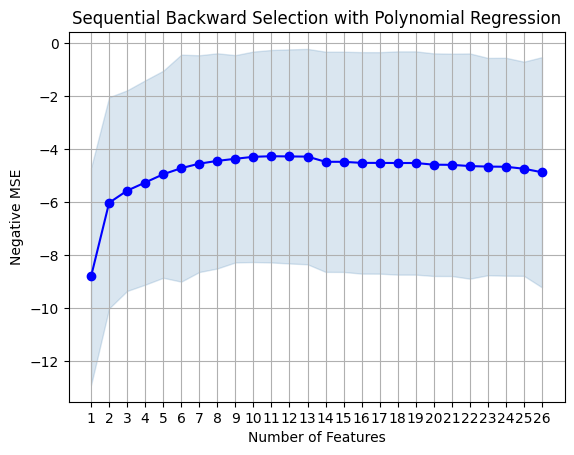

Selected features: (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 19)
MSE: 4.264237153571013

Regression Model:  Linear Regression




[2024-12-06 02:24:38] Features: 25/1 -- score: -3.6239639790450213
[2024-12-06 02:24:39] Features: 24/1 -- score: -3.62420163698809
[2024-12-06 02:24:41] Features: 23/1 -- score: -3.6239299973462864
[2024-12-06 02:24:43] Features: 22/1 -- score: -3.6240943783800987
[2024-12-06 02:24:44] Features: 21/1 -- score: -3.6170399609637385
[2024-12-06 02:24:46] Features: 20/1 -- score: -3.6176662264100337
[2024-12-06 02:24:47] Features: 19/1 -- score: -3.6186648611893992
[2024-12-06 02:24:49] Features: 18/1 -- score: -3.618664861189398
[2024-12-06 02:24:50] Features: 17/1 -- score: -3.61617955618401
[2024-12-06 02:24:51] Features: 16/1 -- score: -3.6335065627442447
[2024-12-06 02:24:52] Features: 15/1 -- score: -3.6556812685981206
[2024-12-06 02:24:53] Features: 14/1 -- score: -3.693998781397306
[2024-12-06 02:24:54] Features: 13/1 -- score: -3.7410437041618523
[2024-12-06 02:24:54] Features: 12/1 -- score: -3.812875107473032
[2024-12-06 02:24:55] Features: 11/1 -- score: -3.8875362647729594
[

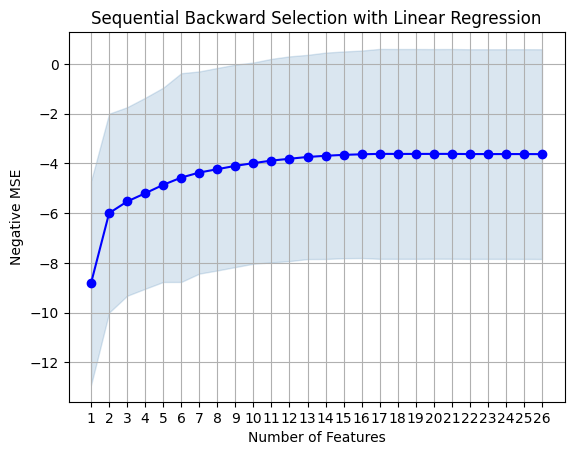

Selected features: (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 19, 21, 23)
MSE: 3.61617955618401

Regression Model:  Decision Tree Regressor




[2024-12-06 02:25:01] Features: 25/1 -- score: -9.992212106299212
[2024-12-06 02:25:05] Features: 24/1 -- score: -10.205118110236223
[2024-12-06 02:25:08] Features: 23/1 -- score: -9.929226131889765
[2024-12-06 02:25:10] Features: 22/1 -- score: -10.259559547244095
[2024-12-06 02:25:12] Features: 21/1 -- score: -10.003229576771654
[2024-12-06 02:25:14] Features: 20/1 -- score: -9.915692667322833
[2024-12-06 02:25:17] Features: 19/1 -- score: -9.884104330708661
[2024-12-06 02:25:19] Features: 18/1 -- score: -9.867716535433072
[2024-12-06 02:25:21] Features: 17/1 -- score: -9.445552411417323
[2024-12-06 02:25:22] Features: 16/1 -- score: -9.34222440944882
[2024-12-06 02:25:24] Features: 15/1 -- score: -8.844248277559055
[2024-12-06 02:25:25] Features: 14/1 -- score: -9.233765994094487
[2024-12-06 02:25:26] Features: 13/1 -- score: -9.444223671259843
[2024-12-06 02:25:28] Features: 12/1 -- score: -9.344937253937008
[2024-12-06 02:25:29] Features: 11/1 -- score: -9.323406742125986
[2024-1

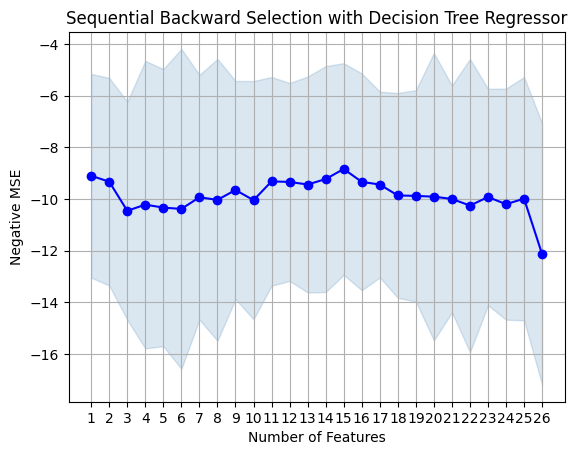

Selected features: (0, 1, 2, 3, 5, 6, 7, 9, 10, 15, 16, 17, 23, 24, 25)
MSE: 8.844248277559055

Regression Model:  Random Forest Regressor




[2024-12-06 02:28:37] Features: 25/1 -- score: -5.250655113188976
[2024-12-06 02:31:09] Features: 24/1 -- score: -5.2080872348671265
[2024-12-06 02:33:48] Features: 23/1 -- score: -5.19525556656004
[2024-12-06 02:36:08] Features: 22/1 -- score: -5.183449213213583
[2024-12-06 02:38:18] Features: 21/1 -- score: -5.192673705708661
[2024-12-06 02:40:21] Features: 20/1 -- score: -5.187198724778544
[2024-12-06 02:42:13] Features: 19/1 -- score: -5.204276226008859
[2024-12-06 02:44:00] Features: 18/1 -- score: -5.198527824187993
[2024-12-06 02:45:41] Features: 17/1 -- score: -5.159848472563977
[2024-12-06 02:47:11] Features: 16/1 -- score: -5.191881755659449
[2024-12-06 02:48:33] Features: 15/1 -- score: -5.225567330216537
[2024-12-06 02:49:48] Features: 14/1 -- score: -5.200039725024606
[2024-12-06 02:50:56] Features: 13/1 -- score: -5.227558882874017
[2024-12-06 02:51:55] Features: 12/1 -- score: -5.3015966812253925
[2024-12-06 02:52:51] Features: 11/1 -- score: -5.232002244709645
[2024-12

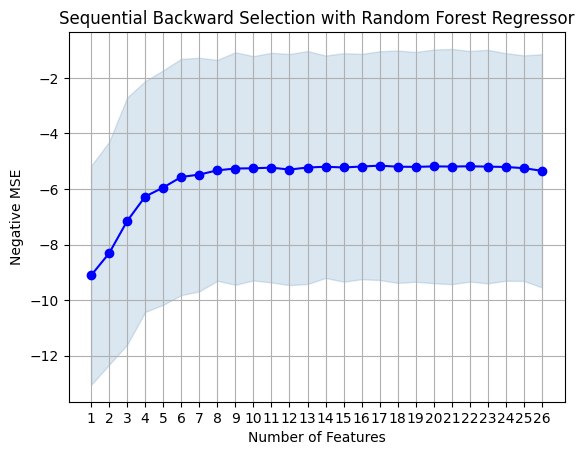

Selected features: (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 20, 23, 25)
MSE: 5.159848472563977

Regression Model:  Support Vector Regressor




[2024-12-06 05:34:59] Features: 25/1 -- score: -3.9892343095057208
[2024-12-06 05:35:22] Features: 24/1 -- score: -3.978464669056893
[2024-12-06 05:35:44] Features: 23/1 -- score: -3.9674301509680263
[2024-12-06 05:36:16] Features: 22/1 -- score: -3.9603896546782567
[2024-12-06 05:36:41] Features: 21/1 -- score: -3.9545311256301536
[2024-12-06 05:36:59] Features: 20/1 -- score: -3.950220379417746
[2024-12-06 05:37:16] Features: 19/1 -- score: -3.9469331531829512
[2024-12-06 05:37:31] Features: 18/1 -- score: -3.9438539014470195
[2024-12-06 05:37:46] Features: 17/1 -- score: -3.9416957252265155
[2024-12-06 05:38:00] Features: 16/1 -- score: -3.9764167284583976
[2024-12-06 05:38:12] Features: 15/1 -- score: -4.048330020769702
[2024-12-06 05:38:23] Features: 14/1 -- score: -4.122507519428968
[2024-12-06 05:38:34] Features: 13/1 -- score: -4.223550554463978
[2024-12-06 05:38:44] Features: 12/1 -- score: -4.320039720930227
[2024-12-06 05:38:53] Features: 11/1 -- score: -4.414670190665811
[

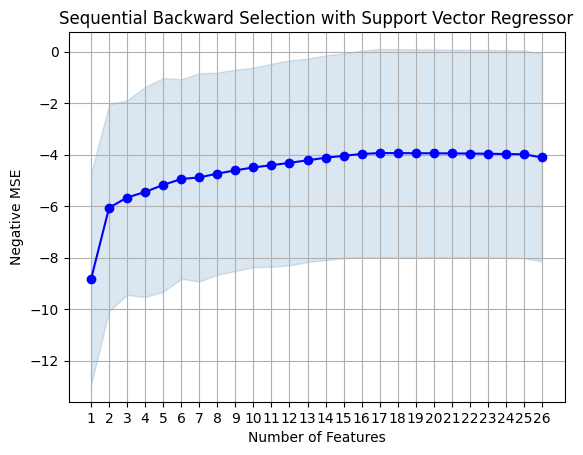

Selected features: (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 20, 21, 23)
MSE: 3.9416957252265155

Regression Model:  Gradient Boosting Regressor




[2024-12-06 05:40:27] Features: 25/1 -- score: -4.557190250871855
[2024-12-06 05:41:09] Features: 24/1 -- score: -4.557532778178439
[2024-12-06 05:41:49] Features: 23/1 -- score: -4.53128735250732
[2024-12-06 05:42:27] Features: 22/1 -- score: -4.537827040785726
[2024-12-06 05:43:02] Features: 21/1 -- score: -4.517364423242435
[2024-12-06 05:43:35] Features: 20/1 -- score: -4.5425600591022155
[2024-12-06 05:44:06] Features: 19/1 -- score: -4.5480761776444005
[2024-12-06 05:44:35] Features: 18/1 -- score: -4.544377824911999
[2024-12-06 05:45:02] Features: 17/1 -- score: -4.595597703495851
[2024-12-06 05:45:26] Features: 16/1 -- score: -4.5410060852385
[2024-12-06 05:45:48] Features: 15/1 -- score: -4.644400708456859
[2024-12-06 05:46:08] Features: 14/1 -- score: -4.583041679351203
[2024-12-06 05:46:26] Features: 13/1 -- score: -4.556654208378447
[2024-12-06 05:46:42] Features: 12/1 -- score: -4.621372006727687
[2024-12-06 05:46:57] Features: 11/1 -- score: -4.657618486150707
[2024-12-0

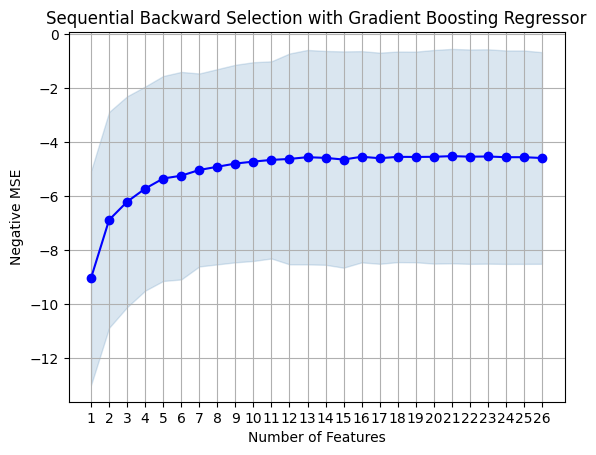

Selected features: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19, 20, 21, 23, 25)
MSE: 4.517364423242435

Regression Model:  Ridge Regression




[2024-12-06 05:48:01] Features: 25/1 -- score: -3.6257184489573016
[2024-12-06 05:48:02] Features: 24/1 -- score: -3.6256018281657525
[2024-12-06 05:48:02] Features: 23/1 -- score: -3.6255506475290153
[2024-12-06 05:48:03] Features: 22/1 -- score: -3.6255315782596873
[2024-12-06 05:48:04] Features: 21/1 -- score: -3.6255145077359905
[2024-12-06 05:48:04] Features: 20/1 -- score: -3.6185867213991223
[2024-12-06 05:48:05] Features: 19/1 -- score: -3.6185765144640056
[2024-12-06 05:48:05] Features: 18/1 -- score: -3.616163561870137
[2024-12-06 05:48:06] Features: 17/1 -- score: -3.616159816161897
[2024-12-06 05:48:06] Features: 16/1 -- score: -3.633686607511707
[2024-12-06 05:48:06] Features: 15/1 -- score: -3.6681157015218
[2024-12-06 05:48:07] Features: 14/1 -- score: -3.7046757309023937
[2024-12-06 05:48:07] Features: 13/1 -- score: -3.7425600575238738
[2024-12-06 05:48:07] Features: 12/1 -- score: -3.81143825471678
[2024-12-06 05:48:08] Features: 11/1 -- score: -3.8878405024442793
[2

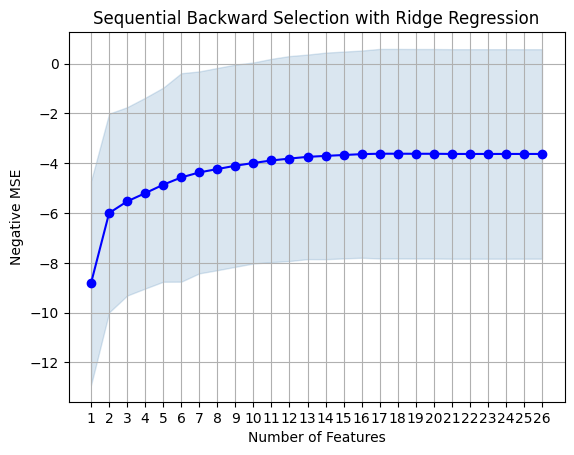

Selected features: (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 20, 21, 22)
MSE: 3.616159816161897

Regression Model:  Lasso Regression




[2024-12-06 05:48:10] Features: 25/1 -- score: -3.632297064209223
[2024-12-06 05:48:11] Features: 24/1 -- score: -3.6322970642092223
[2024-12-06 05:48:11] Features: 23/1 -- score: -3.6293170231160246
[2024-12-06 05:48:12] Features: 22/1 -- score: -3.629317023116024
[2024-12-06 05:48:13] Features: 21/1 -- score: -3.629317023116023
[2024-12-06 05:48:13] Features: 20/1 -- score: -3.624230120740685
[2024-12-06 05:48:14] Features: 19/1 -- score: -3.624230120740685
[2024-12-06 05:48:14] Features: 18/1 -- score: -3.624230120740685
[2024-12-06 05:48:15] Features: 17/1 -- score: -3.6242303604944404
[2024-12-06 05:48:15] Features: 16/1 -- score: -3.639689996318988
[2024-12-06 05:48:15] Features: 15/1 -- score: -3.661791613908884
[2024-12-06 05:48:16] Features: 14/1 -- score: -3.69931927451925
[2024-12-06 05:48:16] Features: 13/1 -- score: -3.746119925900847
[2024-12-06 05:48:16] Features: 12/1 -- score: -3.8173030029048256
[2024-12-06 05:48:17] Features: 11/1 -- score: -3.891198425385415
[2024-

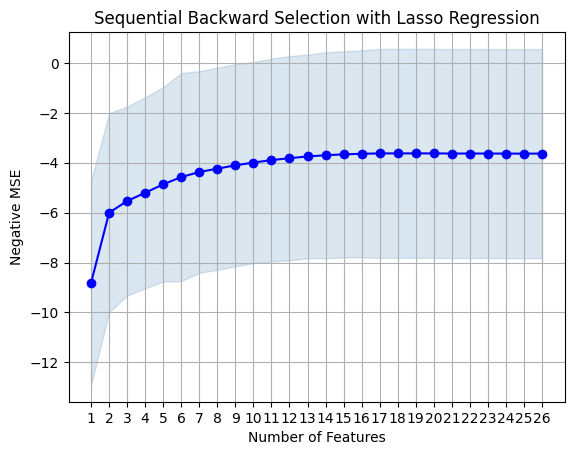

Selected features: (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19, 20, 21, 22, 23)
MSE: 3.624230120740685



In [367]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

model = ["Polynomial Regression","Linear Regression","Decision Tree Regressor","Random Forest Regressor","Support Vector Regressor","Gradient Boosting Regressor","Ridge Regression","Lasso Regression"]

for i in range(len(models)):
    print("Regression Model: ", model[i])
    print()
    sfs[i] = sfs[i].fit(X_train, y_train)
    plot_sfs(sfs[i].get_metric_dict(), kind='std_dev')
    plt.title('Sequential Backward Selection with ' + model[i])
    plt.grid()
    plt.ylabel("Negative MSE")
    plt.show()
    print('Selected features:', sfs[i].k_feature_idx_)
    print('MSE:', -sfs[i].k_score_)
    print()


Τώρα για κάθε μέθοδο θα πάρουμε το αντίστοιχο dataset.

In [393]:
X_train_models, X_test_models = [],[]

for i in range(len(models)):
    X_train_models.append(X_train.iloc[:,list(sfs[i].k_feature_idx_)])
    X_test_models.append(X_test.iloc[:,list(sfs[i].k_feature_idx_)])